In [1]:
import numpy as np
import pickle
import csv
import torch
from torch.linalg import inv, eig, pinv
from matplotlib import pyplot as plt
from tools import whiten
from sklearn import svm, metrics
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from tools import load, split, estimate_derivative, train, test

In [2]:
file = 'mix_100_20_1'
# file = '1_600_20'
cm = ListedColormap(plt.rcParams['axes.prop_cycle'].by_key()['color'])

data, sequence, times_sec, sequence_sec = load(file, reduced=True)

labels = np.zeros_like(times_sec)
for i, t in enumerate(sequence_sec):
    try:
        flag = (times_sec > sequence_sec[i]) & (times_sec < sequence_sec[i+1])
    except IndexError:
        flag = (times_sec > sequence_sec[i])
    labels[flag] = int(sequence[i][1])

In [3]:
X = []
Y = []
I = []

for i, t in enumerate(sequence_sec):
    try:
        flags = (times_sec > sequence_sec[i]) & (times_sec < sequence_sec[i+1])
    except IndexError:
        flags = (times_sec > sequence_sec[i])
    sample = data[flags][:18]
    t_sample = times_sec[flags][:18]

    x0 = sample[0, :]
    t0 = t_sample[0]
    int = np.zeros((sample.shape[1]))
    for k in range(1, sample.shape[0]):
        dif = np.abs(sample[k, :] - x0)/(t_sample[k] - t0)
        int += dif
    if len(sample.flatten()) == 144:
        X.append(sample)
        Y.append(sequence[i][1]-1)
        I.append(int)

X = np.array(X)
Y = np.array(Y)
I = np.array(I)

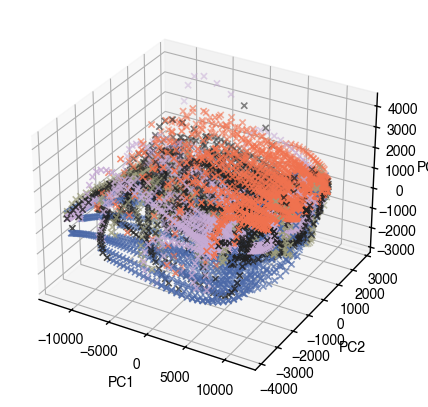

In [6]:
n_frames = 10000

flags = labels > 0
flags = flags[:n_frames]
names = ['Ethylene', 'Carbon monoxide', 'Methane', 'Ethylene + carbon monoxide', 'Methane + carbon monoxide', 'Ethylene + Methane']

pca = PCA(n_components=3)
pca.fit(data)
transform = pca.transform(data[:n_frames])

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transform[flags,0], transform[flags,1], transform[flags,2],
           c=labels[:n_frames][flags],
           cmap=cm,
           marker='x',
           )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

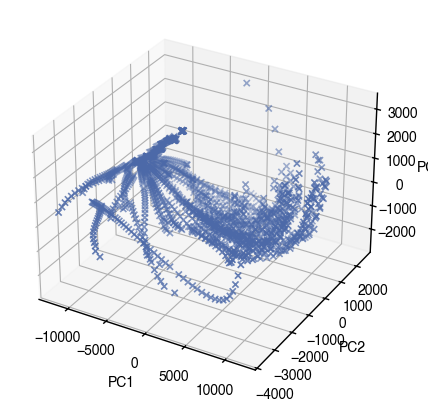

In [13]:
flags = labels == 5
flags = flags[:n_frames]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transform[flags,0], transform[flags,1], transform[flags,2],
           c=labels[:n_frames][flags],
           cmap=cm,
           marker='x',
           )
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()